In [1]:
#1 
#import libraries
import numpy as np
import pandas as pd
import matplotlib
#print(np.__version__)
#print(pd.__version__)
#print(matplotlib.__version__)

In [2]:
#2 
#load data from csv file
adults_df = pd.read_csv("Adult.data.csv")
#print first 5 rows
print(adults_df.iloc[0:5])

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
#2
#print last two rows
print(adults_df.iloc[-2:])

       age workclass  fnlwgt education  education.num marital.status  \
32559   58   Private  151910   HS-grad              9        Widowed   
32560   22   Private  201490   HS-grad              9  Never-married   

         occupation relationship   race     sex  capital.gain  capital.loss  \
32559  Adm-clerical    Unmarried  White  Female             0             0   
32560  Adm-clerical    Own-child  White    Male             0             0   

       hours.per.week native.country income  
32559              40  United-States  <=50K  
32560              20  United-States  <=50K  


In [4]:
#2
#display number or rows and columns
print("Data has", adults_df.shape[0], "rows, and", adults_df.shape[1], "columns")

Data has 32561 rows, and 15 columns


In [5]:
#3
#rename column label 'income' to '50K'
adults_df = adults_df.rename(columns={'income':'50K'})
#print first 2 rows
print(adults_df.iloc[:2])

   age workclass  fnlwgt education  education.num marital.status  \
0   90         ?   77053   HS-grad              9        Widowed   
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country    50K  
0              40  United-States  <=50K  
1              18  United-States  <=50K  


In [6]:
#4
#examine data quality
#having missing data values can lead to inaccurate results
#in the '50K' column ">/<" signs makes the column harder to read
#can get the participants actual income instead. Can still sort by 
    #greater or less than 50K, or provide deeper data if needed
#to keep unknpown values out of the dataframe can have the rows with unknown data values 
    #filtered out as they being read from the csv file
adults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  50K             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#4
#examine data quality
#print data type
#find unique values
for col in adults_df:
    print(adults_df[col].unique)

<bound method Series.unique of 0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64>
<bound method Series.unique of 0              ?
1        Private
2              ?
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object>
<bound method Series.unique of 0         77053
1        132870
2        186061
3        140359
4        264663
          ...  
32556    310152
32557    257302
32558    154374
32559    151910
32560    201490
Name: fnlwgt, Length: 32561, dtype: int64>
<bound method Series.unique of 0             HS-grad
1             HS-grad
2        Some-college
3             7th-8th
4        Some-college
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: edu

In [8]:
#5
#remove unknown values
#replace "?" with "NaN", copy to new dataframe
adults_df2 = adults_df.replace('?',np.nan)
#remove NaN values
adults_df2 = adults_df2.dropna()

#count number of removed rows
df_1_Count = len(adults_df)
df_2_Count = len(adults_df2)
print(df_1_Count - df_2_Count, "data records were removed")

2399 data records were removed


In [9]:
#6
#show numerical summary statistics
data = adults_df2.describe(include = [np.number])
#round data to 2 decimal places
data.round(2)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.00,30162.00,30162.00,30162.00,30162.00,30162.00
mean,38.44,189793.83,10.12,1092.01,88.37,40.93
std,13.13,105652.97,2.55,7406.35,404.30,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.25,9.00,0.00,0.00,40.00
50%,37.00,178425.00,10.00,0.00,0.00,40.00
75%,47.00,237628.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [10]:
#7
#count number of rows with income over 50K as well as those with income under 50K
below_50K = adults_df2['50K'].value_counts()['<=50K']
above_50K = adults_df2['50K'].value_counts()['>50K']

#display results
print("Number of incomes below $50K:", below_50K, "or", '{below_percent:.2%}'.format(below_percent=below_50K/len(adults_df2)))
print("Number of incomes above $50K:", above_50K, "or", '{above_percent:.2%}'.format(above_percent=above_50K/len(adults_df2)))

Number of incomes below $50K: 22654 or 75.11%
Number of incomes above $50K: 7508 or 24.89%


In [11]:
#8
#separate classes for analysis
#income over 50K
more_df = adults_df2.loc[adults_df2['50K'] == '>50K']
print("Number of incomes over $50K:", len(more_df))
#income less than 50K
less_df = adults_df2.loc[adults_df2['50K'] == '<=50K']
print("Number of incomes less than $50K:", len(less_df))

Number of incomes over $50K: 7508
Number of incomes less than $50K: 22654


<AxesSubplot:>

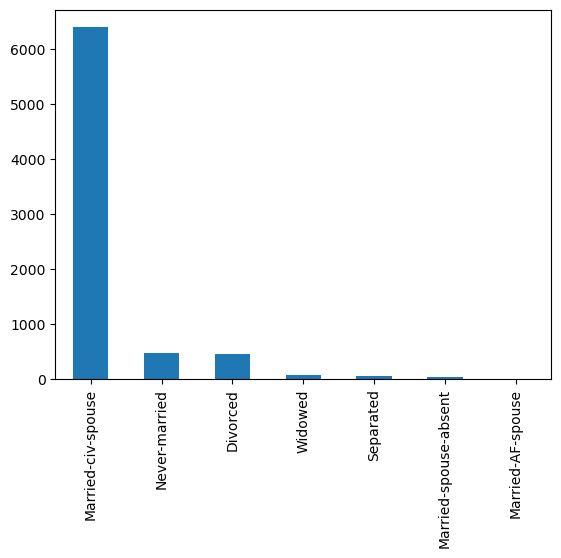

In [12]:
#9
#bar graph for marital status for more than $50K income dataframe
more_df['marital.status'].value_counts().plot(kind='bar')

<AxesSubplot:>

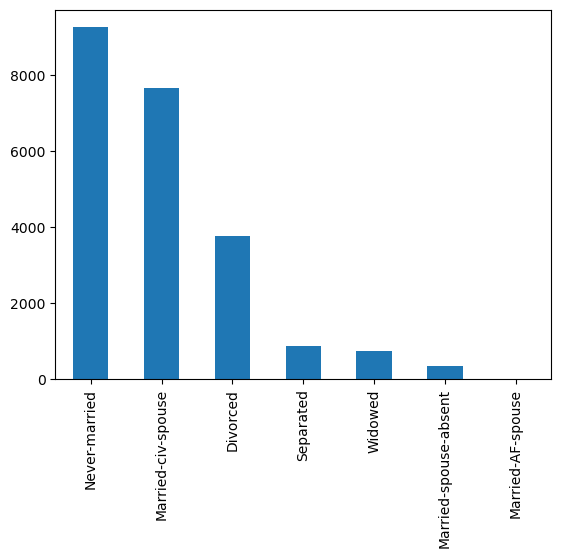

In [13]:
#9
#bar graph for marital status for less than $50K income dataframe
less_df['marital.status'].value_counts().plot(kind='bar')

In [14]:
#9
#the marital status with the largest showing for those who earn more than $50K 
    #is 'Married-civ-spouse' with it accounting for 85% of the statuses. 
    #'Never-married', and 'Divorced' both holding 6%. And the 4 lower values 
    #accounting for an average of 2% the total statuses

In [15]:
#9
#the marital status with the largest showing for those who earn less than $50K 
    #is 'Never-married' with it accounting for 40% of the statuses. 
    #'Married-civ-spouse' in second place holding 33% and 'Divorced' holding 16%. 
    #And the 4 lower values accounting for an average of 2.1% the total statuses

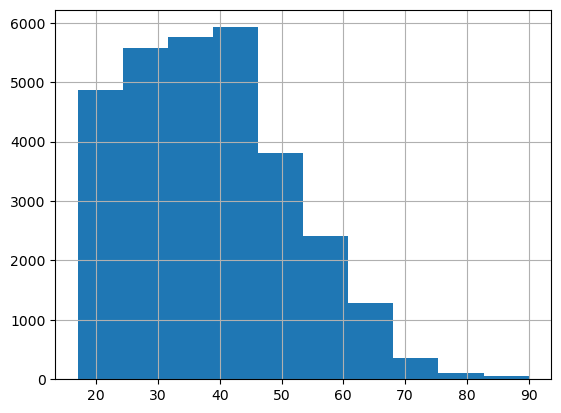

In [16]:
#10
#histogram for overall dataframe
hist = adults_df2.age.hist(bins=10)
#the overall dataframe show a right skewed graph

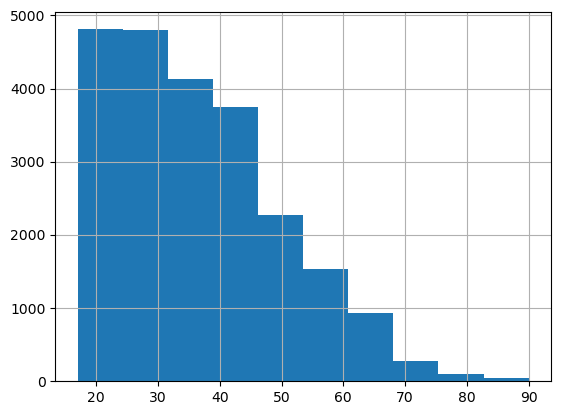

In [17]:
#10
#histogram for earns less than $50K income dataframe
hist = less_df.age.hist(bins=10)
#the earns less than $50K dataframe also shows a right skewed graph

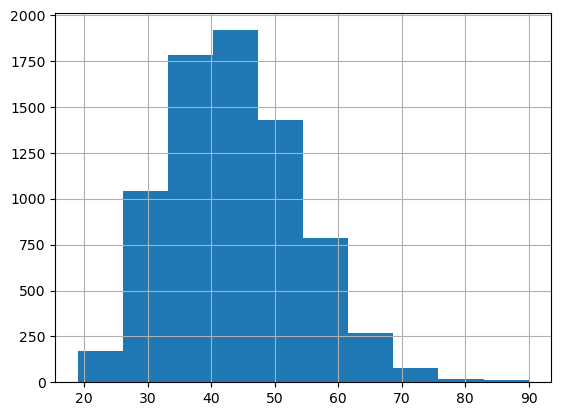

In [18]:
#10
#histogram for earns more than $50K income dataframe
hist = more_df.age.hist(bins=10)
#the earns more than $50K dataframe shows a bell shaped graph